In [10]:
pip install pandas scikit-learn joblib 

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install xlrd==2.0.1

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install openpyxl



   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   ---------------------------------------- 2/2 [openpyxl]

Note: you may need to restart the kernel to use updated packages.


In [17]:
import pandas as pd

df = pd.read_excel('default of credit card clients.xls')
df.to_csv('default_of_credit_card_clients.csv', index=False)

print("Converted successfully!")


Converted successfully!


In [23]:
# =========================================
# CREDIT WORTHINESS PREDICTION MODEL
# =========================================

# 1️⃣ Import Libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    roc_auc_score
)

import joblib

# =========================================
# 2️⃣ Load Dataset
# =========================================
df = pd.read_csv('default_of_credit_card_clients.csv')

print("Dataset Shape:", df.shape)
print(df.head())

# =========================================
# 3️⃣ Data Cleaning & Feature Engineering
# =========================================

# Load dataset correctly
df = pd.read_csv('default_of_credit_card_clients.csv', header=1)

# Drop ID column
df = df.drop(columns=['ID'])

# Fix EDUCATION & MARRIAGE as before
df['EDUCATION'] = df['EDUCATION'].replace([0,5,6], 4)
df['MARRIAGE'] = df['MARRIAGE'].replace(0, 3)

# Encode categorical variables
df['SEX'] = df['SEX'].map({1:0, 2:1})
df['EDUCATION'] = df['EDUCATION'].map({1:0,2:1,3:2,4:3})
df['MARRIAGE'] = df['MARRIAGE'].map({1:0,2:1,3:2})

# Handle missing values (if any)
df.fillna(df.mean(numeric_only=True), inplace=True)

# =========================================
# 4️⃣ Feature Selection
# =========================================
X = df.drop(columns=['default payment next month'])
y = df['default payment next month']

# =========================================
# 5️⃣ Feature Scaling
# =========================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# =========================================
# 6️⃣ Train-Test Split
# =========================================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# =========================================
# 7️⃣ Train Random Forest Model
# =========================================
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)

model.fit(X_train, y_train)

# =========================================
# 8️⃣ Model Evaluation
# =========================================
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("\nInitial Model Performance")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("Classification Report:\n", classification_report(y_test, y_pred))

# =========================================
# 9️⃣ Hyperparameter Tuning (GridSearch)
# =========================================
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train, y_train)

print("\nBest Parameters:", grid.best_params_)

# =========================================
# 🔟 Final Model Evaluation
# =========================================
best_model = grid.best_estimator_

y_pred_best = best_model.predict(X_test)
y_prob_best = best_model.predict_proba(X_test)[:, 1]

print("\nFinal Model Performance")
print("Final Accuracy:", accuracy_score(y_test, y_pred_best))
print("Final ROC-AUC:", roc_auc_score(y_test, y_prob_best))
print("Final Classification Report:\n",
      classification_report(y_test, y_pred_best))

# =========================================
# 1️⃣1️⃣ Save Model
# =========================================
joblib.dump(best_model, 'creditworthiness_model.pkl')
print("\nModel saved as creditworthiness_model.pkl")


Dataset Shape: (30001, 25)
  Unnamed: 0         X1   X2         X3        X4   X5     X6     X7     X8  \
0         ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3   
1          1      20000    2          2         1   24      2      2     -1   
2          2     120000    2          2         2   26     -1      2      0   
3          3      90000    2          2         2   34      0      0      0   
4          4      50000    2          2         1   37      0      0      0   

      X9  ...        X15        X16        X17       X18       X19       X20  \
0  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3   
1     -1  ...          0          0          0         0       689         0   
2      0  ...       3272       3455       3261         0      1000      1000   
3      0  ...      14331      14948      15549      1518      1500      1000   
4      0  ...      28314      28959      29547      2000      2019      1200   

        X21      

In [24]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8133333333333334


In [25]:
from sklearn.metrics import classification_report

print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.65      0.34      0.45      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



In [26]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.7586111334638808


In [28]:
pip install seaborn matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pillow-12.0.0-cp313-cp313-win_amd64.whl.metadata (9.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------- ----------------------------- 2.1/8.1 MB 13.2 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.1 MB 12.2 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.1 MB 11.4 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 10.0 MB/s  0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   --------------------------- ------------ 1.6/2.3 MB 9.4 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 7.9 MB/s  0:00:00
Using cached pillow-12.0.0-cp313-cp313-win_amd64.whl (7.0 MB)

   ----- ---------------------------------- 1/8 [pillow]
   ----- ---------------------------------- 1/8 [pillow]
   --------------- ----------------------

Confusion Matrix:
 [[4423  250]
 [ 870  457]]


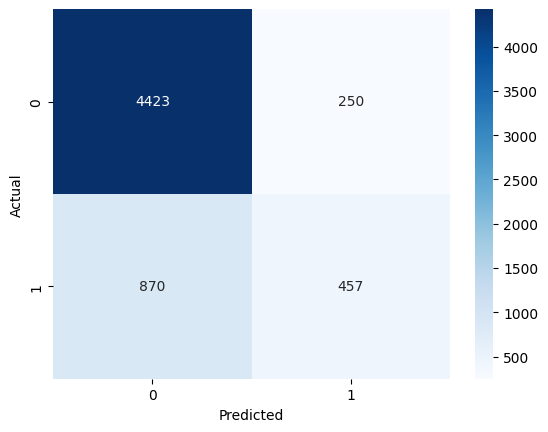

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Optional: heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [30]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print("Cross-validation accuracies:", scores)
print("Mean CV accuracy:", scores.mean())


Cross-validation accuracies: [0.80333333 0.809      0.81783333 0.82983333 0.81666667]
Mean CV accuracy: 0.8153333333333332


In [33]:
pip install imblearn lightgbm 

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------- ----------- 1.0/1.5 MB 13.2 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 11.6 MB/s  0:00:00
Note: you may need to restart the kernel to use updated packages.


Dataset Shape: (30000, 25)
   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month

d:\FINAL_YEAR_PROJECTS\Internship_codealpha\Credit\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
d:\FINAL_YEAR_PROJECTS\Internship_codealpha\Credit\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



Model Performance on Test Set
Accuracy: 0.8081666666666667
ROC-AUC: 0.7688328354892243
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      4673
           1       0.59      0.45      0.51      1327

    accuracy                           0.81      6000
   macro avg       0.72      0.68      0.70      6000
weighted avg       0.79      0.81      0.80      6000



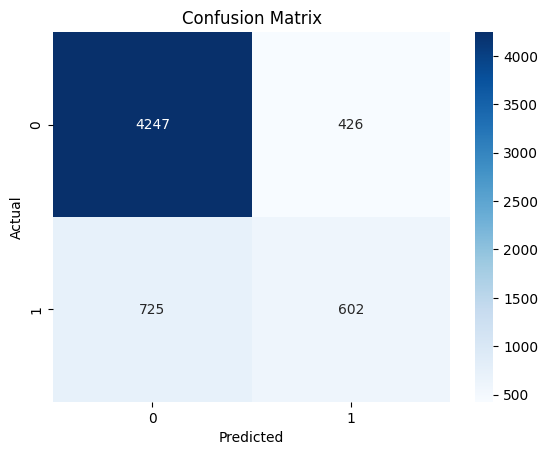

Model saved as 'creditworthiness_model.pkl'


In [34]:
# =========================================
# CREDIT WORTHINESS PREDICTION MODEL
# =========================================

# 1️⃣ Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: LightGBM
import lightgbm as lgb

# =========================================
# 2️⃣ Load Dataset
# =========================================
df = pd.read_csv('default_of_credit_card_clients.csv', header=1)  # header=1 because first row is column names
print("Dataset Shape:", df.shape)
print(df.head())

# Drop ID column
df.drop(columns=['ID'], inplace=True)

# =========================================
# 3️⃣ Data Cleaning & Feature Engineering
# =========================================
# Fix EDUCATION & MARRIAGE anomalies
df['EDUCATION'] = df['EDUCATION'].replace([0,5,6], 4)
df['MARRIAGE'] = df['MARRIAGE'].replace(0,3)

# Encode categorical variables
df['SEX'] = df['SEX'].map({1:0, 2:1})  # 0 = Male, 1 = Female
df['EDUCATION'] = df['EDUCATION'].map({1:0,2:1,3:2,4:3})
df['MARRIAGE'] = df['MARRIAGE'].map({1:0,2:1,3:2})

# Handle missing values (numeric only)
df.fillna(df.mean(numeric_only=True), inplace=True)

# Feature Engineering
df['avg_bill'] = df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].mean(axis=1)
df['avg_pay'] = df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].mean(axis=1)
df['debt_ratio'] = df['avg_bill'] / df['LIMIT_BAL']
df['payment_ratio'] = df['avg_pay'] / (df['avg_bill']+1e-5)  # avoid division by zero

# =========================================
# 4️⃣ Feature Selection
# =========================================
X = df.drop(columns=['default payment next month'])
y = df['default payment next month']

# =========================================
# 5️⃣ Feature Scaling
# =========================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# =========================================
# 6️⃣ Train-Test Split
# =========================================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# =========================================
# 7️⃣ Handle Imbalanced Classes with SMOTE
# =========================================
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# =========================================
# 8️⃣ Train Models: RandomForest + LightGBM
# =========================================
rf_model = RandomForestClassifier(
    n_estimators=200, max_depth=20, class_weight='balanced', random_state=42
)

lgb_model = lgb.LGBMClassifier(
    n_estimators=500, learning_rate=0.05, max_depth=10, class_weight='balanced', random_state=42
)

# Ensemble model
ensemble_model = VotingClassifier(
    estimators=[('rf', rf_model), ('lgb', lgb_model)],
    voting='soft'  # use probabilities
)

ensemble_model.fit(X_train_res, y_train_res)

# =========================================
# 9️⃣ Model Evaluation
# =========================================
y_pred = ensemble_model.predict(X_test)
y_prob = ensemble_model.predict_proba(X_test)[:, 1]

print("\nModel Performance on Test Set")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# =========================================
# 🔟 Save Trained Model
# =========================================
joblib.dump(ensemble_model, 'creditworthiness_model.pkl')
print("Model saved as 'creditworthiness_model.pkl'")


In [35]:
pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   - -------------------------------------- 2.4/72.0 MB 12.4 MB/s eta 0:00:06
   -- ------------------------------------- 5.2/72.0 MB 12.6 MB/s eta 0:00:06
   ---- ----------------------------------- 7.3/72.0 MB 11.8 MB/s eta 0:00:06
   ---- ----------------------------------- 8.4/72.0 MB 10.0 MB/s eta 0:00:07
   ----- ---------------------------------- 9.2/72.0 MB 9.0 MB/s eta 0:00:08
   ----- ---------------------------------- 10.0/72.0 MB 8.0 MB/s eta 0:00:08
   ----- ---------------------------------- 10.7/72.0 MB 7.3 MB/s eta 0:00:09
   ------ --------------------------------- 11.5/72.0 MB 7.0 MB/s eta 0:00:09
   ------ --------------------------------- 12.6/72.0 MB 6.6 MB/s eta 0:00:09
   ------- -------------------------------- 13.4/72.0 MB 6.4 MB/s eta 0:00:10
   -------- ------------------------------- 14.4/72.0 MB 6.2 MB/s eta 0:00:10
   

Dataset Shape: (30000, 25)
[LightGBM] [Info] Number of positive: 18691, number of negative: 18691
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002124 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7744
[LightGBM] [Info] Number of data points in the train set: 37382, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


d:\FINAL_YEAR_PROJECTS\Internship_codealpha\Credit\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
d:\FINAL_YEAR_PROJECTS\Internship_codealpha\Credit\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



Model Performance on Test Set
Accuracy: 0.808
ROC-AUC: 0.750589051471915
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.89      4673
           1       0.64      0.30      0.41      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.63      0.65      6000
weighted avg       0.79      0.81      0.78      6000



d:\FINAL_YEAR_PROJECTS\Internship_codealpha\Credit\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
d:\FINAL_YEAR_PROJECTS\Internship_codealpha\Credit\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


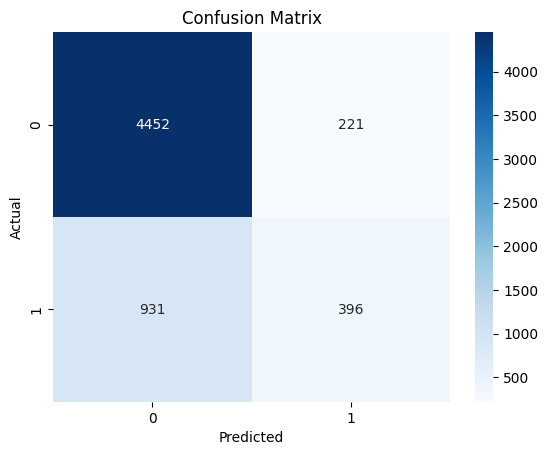

Model saved as 'creditworthiness_stack_model.pkl'


In [36]:
# =========================================
# ADVANCED CREDIT WORTHINESS PREDICTION MODEL
# =========================================

# 1️⃣ Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import joblib
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

# =========================================
# 2️⃣ Load Dataset
# =========================================
df = pd.read_csv('default_of_credit_card_clients.csv', header=1)
print("Dataset Shape:", df.shape)
df.drop(columns=['ID'], inplace=True)

# =========================================
# 3️⃣ Data Cleaning & Feature Engineering
# =========================================
# Fix EDUCATION & MARRIAGE
df['EDUCATION'] = df['EDUCATION'].replace([0,5,6], 4)
df['MARRIAGE'] = df['MARRIAGE'].replace(0,3)

# Encode categorical variables
df['SEX'] = df['SEX'].map({1:0,2:1})
df['EDUCATION'] = df['EDUCATION'].map({1:0,2:1,3:2,4:3})
df['MARRIAGE'] = df['MARRIAGE'].map({1:0,2:1,3:2})

# Fill missing numeric values
df.fillna(df.mean(numeric_only=True), inplace=True)

# Feature engineering
df['avg_bill'] = df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].mean(axis=1)
df['avg_pay'] = df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].mean(axis=1)
df['debt_ratio'] = df['avg_bill'] / df['LIMIT_BAL']
df['payment_ratio'] = df['avg_pay'] / (df['avg_bill'] + 1e-5)
df['max_delay'] = df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].max(axis=1)

# =========================================
# 4️⃣ Feature Selection
# =========================================
X = df.drop(columns=['default payment next month'])
y = df['default payment next month']

# =========================================
# 5️⃣ Feature Scaling
# =========================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# =========================================
# 6️⃣ Train-Test Split
# =========================================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# =========================================
# 7️⃣ Handle Imbalanced Classes with SMOTE
# =========================================
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# =========================================
# 8️⃣ Base Models
# =========================================
rf_model = RandomForestClassifier(
    n_estimators=200, max_depth=20, class_weight='balanced', random_state=42
)

xgb_model = xgb.XGBClassifier(
    n_estimators=500, max_depth=6, learning_rate=0.05, scale_pos_weight=2, random_state=42, use_label_encoder=False, eval_metric='logloss'
)

lgb_model = lgb.LGBMClassifier(
    n_estimators=500, learning_rate=0.05, max_depth=10, class_weight='balanced', random_state=42
)

# =========================================
# 9️⃣ Stacking Ensemble
# =========================================
stack_model = StackingClassifier(
    estimators=[('rf', rf_model), ('xgb', xgb_model), ('lgb', lgb_model)],
    final_estimator=lgb.LGBMClassifier(n_estimators=200, learning_rate=0.05, random_state=42),
    cv=5,
    n_jobs=-1,
    passthrough=True
)

stack_model.fit(X_train_res, y_train_res)

# =========================================
# 🔟 Model Evaluation
# =========================================
y_pred = stack_model.predict(X_test)
y_prob = stack_model.predict_proba(X_test)[:,1]

print("\nModel Performance on Test Set")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# =========================================
# 1️⃣1️⃣ Save Model
# =========================================
joblib.dump(stack_model, 'creditworthiness_stack_model.pkl')
print("Model saved as 'creditworthiness_stack_model.pkl'")
